In [1]:
%load_ext autoreload
%autoreload 2

# data loading

In [3]:
from ipywidgets import interact
import data_analysis as da  # automatically loads and processes results data

/home/bee/.anaconda3/envs/rfs/lib/python3.8/site-packages/pandas/core/generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/home/bee/.anaconda3/envs/rfs/lib/python3.8/site-packages/pandas/core/generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**Description of the `da.scores` and `da.feature_sets` datasets.**

1. **`da.scores`** includes flat `best_algorithm_` and the refitted `best_algorithm_`s from `ncv_*`.
  - from `'d_scores_complete.csv'`
  - The main purpose is to provide a comparison of FlatCV vs NestedCV
  - for generic plotting
    - general overview
    - boxplots
    - performance heatmaps
2. **`da.feature_sets`**
  - to plot out radiomic signature heatmaps

# scores / generic plot

**The cell below lists the parameters to obtain the same plots as the ones included in the paper.**

In [5]:
@interact(figure=da.results_plots_params.keys())
def plot_figure(figure):
    da.multi_plot(**da.results_plots_params[figure])

interactive(children=(Dropdown(description='figure', options=('fig2', 'fig3a', 'fig3b', 'fig3c', 'fig3d', 'fig…

**Use this interface for more flexible plotting options.**

In [6]:
interact(da.multi_plot, **da.multi_controls)

interactive(children=(Dropdown(description='x', options=('dataset[feat_range]', 'dataset[feat_range][fs_method…

<function data_analysis.multi_plot(x, hue, plotter, as_cv_step='both', incl_filtered='both', metric='kappa', stat='test', model='all', dataset=['rectal[3-15-1]', 'abus[3-15-1]', 'pancreatic[3-15-1]', 'pancreatic[5-40-5]'], rotate_xticks=False)>

# Effect of the number of features on the test set performance (Figure 5)

/home/bee/.anaconda3/envs/rfs/lib/python3.8/site-packages/pandas/core/generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/home/bee/.anaconda3/envs/rfs/lib/python3.8/site-packages/pandas/core/generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


coef        R2          F      pval
ds                 fsm                                                     
abus[3-15-1]       boruta_lightgbm  0.049609  0.351141  44.375594  0.000000
                   lasso            0.019479  0.380059  50.270580  0.000000
pancreatic[3-15-1] lasso            0.012081  0.357421  45.610687  0.000000
                   rfe_lasso        0.011127  0.283552  32.453497  0.000000
pancreatic[5-40-5] kbest_mi         0.002873  0.150141  14.486586  0.000271
                   lasso            0.001944  0.064528   5.656321  0.019718

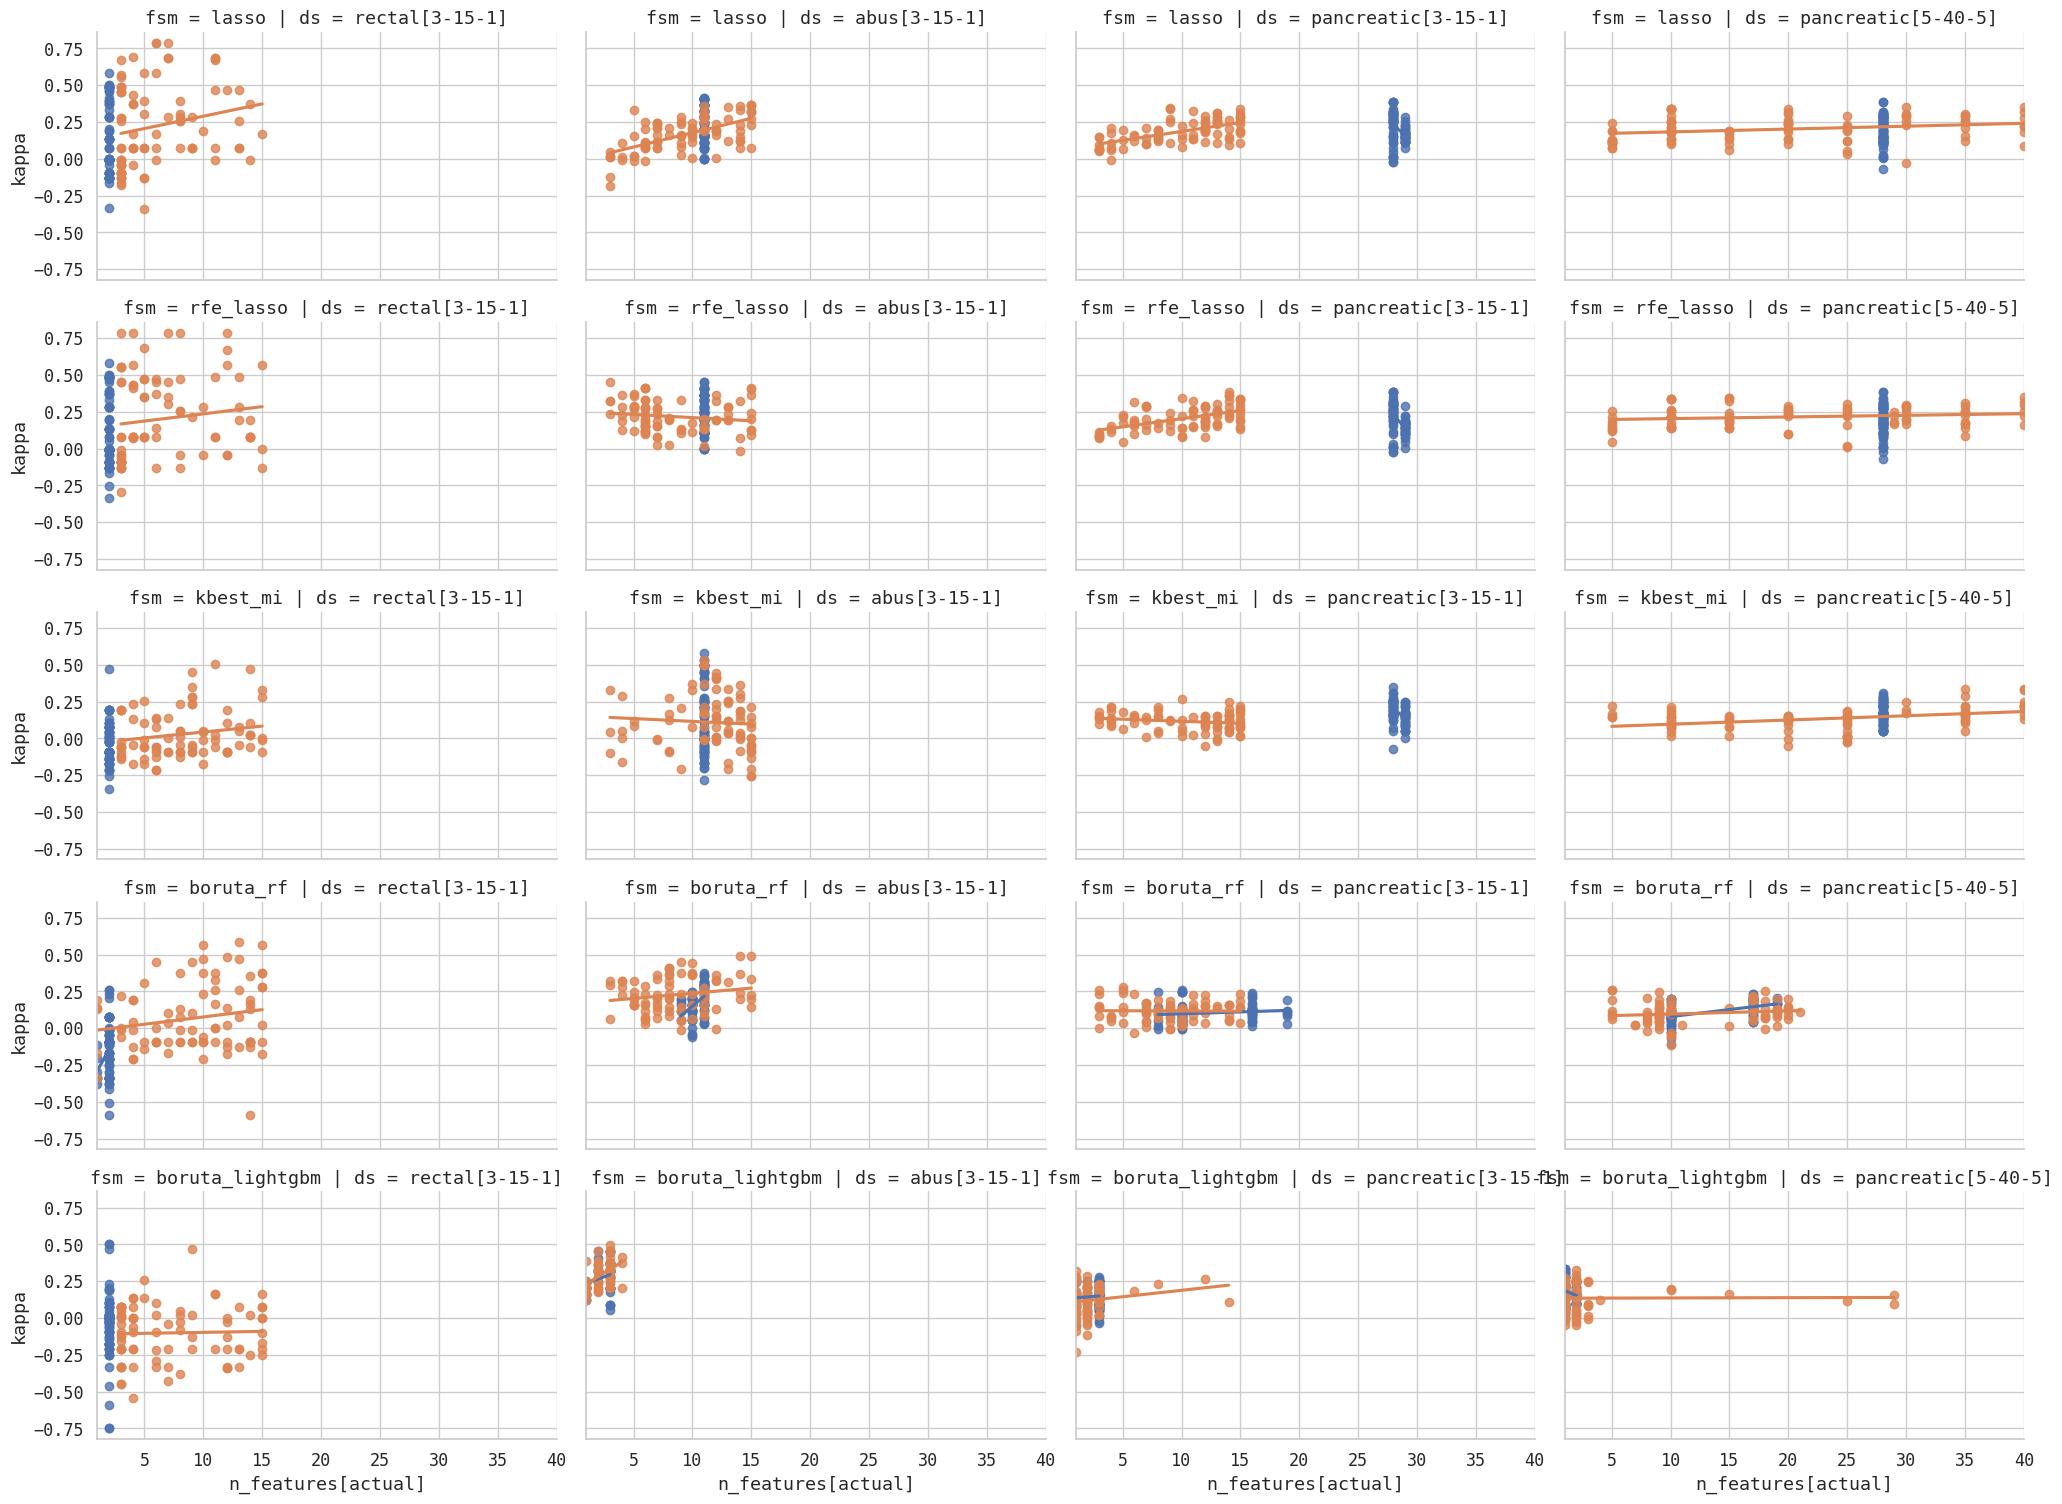

In [7]:
da.figure_5()

# NestedCV vs FlatCV for algorithm choice (Table 6)

In [12]:
rankings, kendall_tau = da.table_6()
kendall_tau[kendall_tau.pval < .05]

tau  \
dataset[feat_range] as_cv_step fs_method       incl_filtered             
abus[3-15-1]        False      boruta_lightgbm False          0.809524   
                               boruta_rf       True           0.714286   
                               lasso           True           0.809524   
                               rfe_lasso       False          0.714286   
                    True       kbest_mi        True           0.714286   
                               lasso           False          0.714286   
pancreatic[3-15-1]  False      boruta_rf       False          0.904762   
                               kbest_mi        False          0.714286   
                               lasso           False          0.904762   
                                               True           0.714286   
                               rfe_lasso       False          0.809524   
                                               True           0.714286   
pancreatic[5-40-5]  False      kbest_mi        True           0.714286   
                               lasso           True           0.714286   
                               rfe_lasso       True           0.904762   
                    True       boruta_rf       False          0.714286   
                                               True           0.809524   
rectal[3-15-1]      False      boruta_lightgbm False          0.809524   
                               kbest_mi        True           0.714286   

                                                                  pval  \
dataset[feat_range] as_cv_step fs_method       incl_filtered             
abus[3-15-1]        False      boruta_lightgbm False          0.010714   
                               boruta_rf       True           0.030159   
                               lasso           True           0.010714   
                               rfe_lasso       False          0.030159   
                    True       kbest_mi        True           0.030159   
                               lasso           False          0.030159   
pancreatic[3-15-1]  False      boruta_rf       False          0.002778   
                               kbest_mi        False          0.030159   
                               lasso           False          0.002778   
                                               True           0.030159   
                               rfe_lasso       False          0.010714   
                                               True           0.030159   
pancreatic[5-40-5]  False      kbest_mi        True           0.030159   
                               lasso           True           0.030159   
                               rfe_lasso       True           0.002778   
                    True       boruta_rf       False          0.030159   
                                               True           0.010714   
rectal[3-15-1]      False      boruta_lightgbm False          0.010714   
                               kbest_mi        True           0.030159   

                                                              equal_first_place  \
dataset[feat_range] as_cv_step fs_method       incl_filtered                      
abus[3-15-1]        False      boruta_lightgbm False                       True   
                               boruta_rf       True                        True   
                               lasso           True                       False   
                               rfe_lasso       False                       True   
                    True       kbest_mi        True                       False   
                               lasso           False                      False   
pancreatic[3-15-1]  False      boruta_rf       False                       True   
                               kbest_mi        False                       True   
                               lasso           False                       True   
                                            

# Top 5 per dataset (Table 7)

In [22]:
da.table_7(metric='kappa', topn=5)

/home/bee/.anaconda3/envs/rfs/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


(kappa, test)  \
dataset[feat_range] as_cv_step fs_method       incl_filtered algorithm model                  
rectal[3-15-1]      True       rfe_lasso       False         lr        ncv_2       0.784091   
                                                             mlp       flat        0.784091   
                               lasso           False         mlp       ncv_2       0.784091   
                                                             lr        ncv_2       0.784091   
                                                                       ncv_1       0.784091   
abus[3-15-1]        False      kbest_mi        True          gbc       ncv_2       0.577338   
                    True       kbest_mi        True          gbc       ncv_4       0.533814   
                    False      kbest_mi        True          gbc       ncv_1       0.531278   
                                                                       ncv_4       0.531278   
                    True       boruta_lightgbm True          knn       ncv_1       0.498221   
pancreatic[3-15-1]  True       rfe_lasso       True          rf        ncv_1       0.384858   
                    False      lasso           True          svm       ncv_1       0.382276   
                               rfe_lasso       True          svm       ncv_1       0.382276   
                                                                       ncv_3       0.382276   
                                                                       ncv_4       0.382276   
pancreatic[5-40-5]  False      lasso           True          svm       ncv_3       0.382276   
                               rfe_lasso       True          svm       ncv_3       0.382276   
                                                                       ncv_0       0.382276   
                               lasso           True          svm       ncv_0       0.382276   
                    True       lasso           True          rf        flat        0.353312   

                                                                              (kappa, cv_mean)  \
dataset[feat_range] as_cv_step fs_method       incl_filtered algorithm model                     
rectal[3-15-1]      True       rfe_lasso       False         lr        ncv_2          0.022145   
                                                             mlp       flat           0.283683   
                               lasso           False         mlp       ncv_2          0.073427   
                                                             lr        ncv_2          0.022145   
                                                                       ncv_1          0.022145   
abus[3-15-1]        False      kbest_mi        True          gbc       ncv_2          0.519016   
                    True       kbest_mi        True          gbc       ncv_4          0.427927   
                    False      kbest_mi        True          gbc       ncv_1          0.539183   
                                                                       ncv_4          0.534285   
                    True       boruta_lightgbm True          knn       ncv_1          0.512123   
pancreatic[3-15-1]  True       rfe_lasso       True          rf        ncv_1          0.462260   
                    False      lasso           True          svm       ncv_1          0.521840   
                               rfe_lasso       True          svm       ncv_1          0.521840   
                                                                       ncv_3          0.521840   
                                                                       ncv_4          0.521840   
pancreatic[5-40-5]  False      lasso           True          svm       ncv_3          0.521840   
                               rfe_lasso       True          svm       ncv_3          0.521840   
                                                                       ncv_0          0.521840   
                           

# Additional material

## performance heatmaps - `fs_method` vs `algorithm`

In [26]:
interact(da.heatmap_plot, **da.heatmap_options)

interactive(children=(Dropdown(description='x', options=('algorithm', 'fs_method', 'as_cv_step', 'incl_filtere…

<function data_analysis.heatmap_plot(x, y, as_cv_step, incl_filtered, metric, stat, algorithm, dataset)>

## feature sets / radiomic signatures (fix)

In [80]:
interact(da.rs_plot, **da.rs_plot_options)

/home/bee/.anaconda3/envs/rfs/lib/python3.8/site-packages/pandas/core/generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/home/bee/.anaconda3/envs/rfs/lib/python3.8/site-packages/pandas/core/generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


interactive(children=(Dropdown(description='dataset', options=('rectal[3-15-1]', 'abus[3-15-1]', 'pancreatic[3…

<function data_analysis.rs_plot(dataset, algorithm, top_features=3)>